# Overview

# Imports

In [5]:
import numpy as np
from scipy.stats import norm, poisson
from scipy.interpolate import InterpolatedUnivariateSpline
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
%matplotlib inline

from plot_config import config_plots

In [6]:
config_plots()

# Figure 1
- Sensitivity optimization: mean vs. median

In [23]:
#bs = np.arange(0.01, 0.481, 0.01)
bs = np.arange(0.01, 0.51, 0.01)

In [24]:
bs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ])

In [25]:
ss = np.linspace(1, 11, 20)
ss_med = np.linspace(1, 11, 1001)
ks = np.arange(0, 20, 1)

In [26]:
def meanNsigma(b, s, ks): 
    ps = poisson.pmf(k=ks, mu=s+b) 
    sigmas = np.array([norm.isf(poisson.sf(k=k_-1, mu=b), loc=0, scale=1) 
                       if k_ > 0 else norm.isf(poisson.sf(k=0, mu=b), loc=0, scale=1) for k_ in ks]) 
    return np.sum(ps*sigmas)/np.sum(ps)

def get_s_5sigma(b, ks=ks, ss=ss): 
    meanNsigs = np.array([meanNsigma(b, s_, ks) for s_ in ss]) 
    s5 = InterpolatedUnivariateSpline(ss, meanNsigs - 5).roots()[0] 
    return s5

def calc_mean_med_5sigma(b, ks=ks, ss=ss, ss_med=ss_med): 
    s = 0 
    n = s + b 
    s_mean = get_s_5sigma(b, ks, ss) 
    ndisc = poisson.isf(2.87e-7, mu=n)+1 
    sfs = poisson.sf(k=ndisc-1, mu=ss_med+b) 
    s_med = ss_med[np.argmin(abs(sfs-0.5))] 
    return s_mean, s_med 


In [27]:
s_means, s_meds = np.array([calc_mean_med_5sigma(b_, ks, ss, ss_med) for b_ in bs]).T 

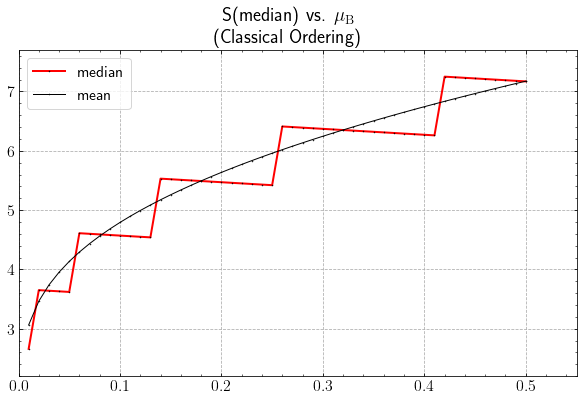

In [29]:
# make plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(bs, s_meds, 'r-', linewidth=2, marker='.', mfc='black', mec='black', ms=1, zorder=10, label='median')
ax.plot(bs, s_means, 'k-', linewidth=1, marker='.', mfc='black', mec='black', ms=1, zorder=11, label='mean')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlim([0, 0.55])
ax.set_ylim([2.2, 7.7])
ax.legend()
fig.suptitle(r'S(median) vs. $\mu_\mathrm{B}$'+'\n(Classical Ordering)');
fig.savefig('S_vs_muB.png', transparent=False)
fig.savefig('S_vs_muB.pdf', transparent=False)